In [26]:
import sys
import json
import base64
import numpy as np
from scipy import misc

import matplotlib.pyplot as plt

from pathlib import Path

import skvideo.io

In [27]:
PATH = Path.cwd()

In [28]:
DATA_PATH = Path('../data/Train')

In [29]:
# file = sys.argv[-1]
file = 'test_video.mp4'

video = skvideo.io.vread(file)

In [30]:
def decode(packet):
	img = base64.b64decode(packet)
	filename = PATH/'image.png'
	with open(filename, 'wb') as f:
			f.write(img)
	result = misc.imread(filename)
	return result

with open(PATH/'results.json') as json_data:
	ans_data = json.loads(json_data.read())
	json_data.close()

frames_processed = 0

In [31]:
video[0].shape

(600, 800, 3)

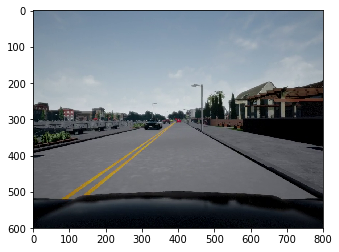

In [32]:
plt.imshow(video[29])

/home/paperspace/anaconda3/envs/lyft/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


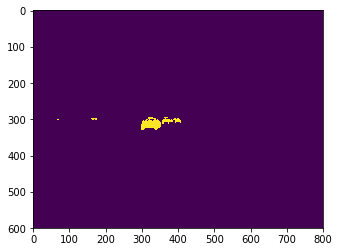

In [33]:
plt.imshow(decode(ans_data[str(30)][0]))

In [34]:
c = decode(ans_data[str(30)][0])
r = decode(ans_data[str(30)][1])

/home/paperspace/anaconda3/envs/lyft/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [35]:
res = np.zeros_like(video[0])

In [36]:
VEHICLES=10
ROADS=7
ROAD_LINES=6

In [37]:
res[c] = VEHICLES
res[r] = ROADS

In [38]:

import scipy.misc

/home/paperspace/anaconda3/envs/lyft/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/home/paperspace/anaconda3/envs/lyft/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  # Remove the CWD from sys.path while we load stuff.
/home/paperspace/anaconda3/envs/lyft/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  # This is added back by InteractiveShellApp.init_path()


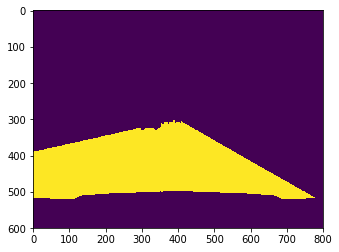

In [39]:
rlist = []
for frame in range(1,len(ans_data.keys())+1):
    res = np.zeros_like(video[frame])
    c = decode(ans_data[str(frame)][0])
    r = decode(ans_data[str(frame)][1])
    res[c==True] = VEHICLES
    res[r==True] = ROADS
    rlist.append(res)
    scipy.misc.imsave(DATA_PATH/f'AnswersSeg/{frame-1}.png', res)
    scipy.misc.imsave(DATA_PATH/f'AnswersRGB/{frame-1}.png', video[frame])

In [40]:
frame = ans_data['1']

In [41]:
frame[0]

'iVBORw0KGgoAAAANSUhEUgAAAyAAAAJYCAAAAAC/Hd2sAAADgklEQVR4nO3a627iMBAG0JlV3/+VZ380ZANxDE0b4mbPkVqVIKg1zucbRAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA7JdnN+DnZETU2Y3gYj7ObsAPqog8ISF3Y4yEXsyOgEw3xFi3QlZzLsyoQyeW9Ztn/78ti5cRMTd7rHJy011iZTWH5IyoPGm43pTNGSSPvfEaFdjM42pceSj9SMVk1g5ITiPcs54++P77ivbInVGRdVQzMyqnGSrnOSGao8p0aS53ZT3UfphKsvSVTXrW8gXzg0F6tpmCQxOccw1qvhIRlbVKyC2k3XIPUkiWNmaQaW1cGevOXr3BGB379gXf5+w0VfBhgrivyYuj0Bh15E5rk5413feZt4fbhunVtzZkGhbu1kmLGFS+EtfHRRYD2jzFqsxonwwR+fmT/+7wfHh+mHGD7+ls0n3w1vF06FhWbnVedVuX2qYPrz2D1PyLYyjuL/Hn7Ab8Ts/Xnv3zKvn4La70VZP32bE3uzsJXl++1LfirkRA3qLaf99dlpAR6ZUdXiqaVdQl2INAh4Acxdx8CQICHQICHQICHQICHQJyFMe8lyAg0OGT9N3a33h2unstAvItG+soy6vLsMTaSwj+CwKyQy8b9eR5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

0.0023458333333333335
0.023458333333333335
0.18709583333333332
1.3331291666666667


/home/paperspace/anaconda3/envs/lyft/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


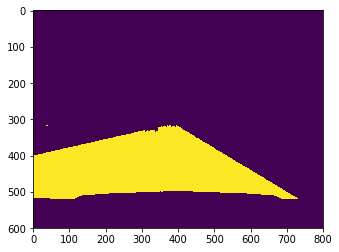

In [42]:
res = np.zeros_like(video[0])
c = decode(frame[0])
# res = np.zeros_like(c)
r = decode(frame[1])
plt.imshow(r)
print(np.mean(c))
res[c==True] = VEHICLES
print(np.mean(res))
res[r==True] = ROADS
print(np.mean(r))
print(np.mean(res))

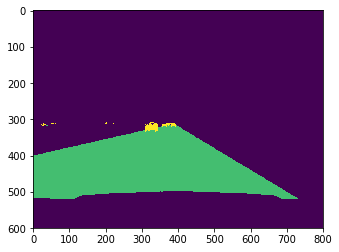

In [43]:
plt.imshow(res[:,:,0])

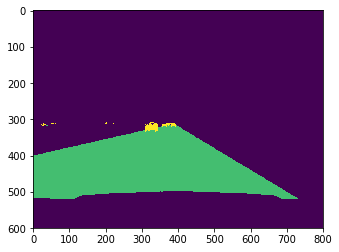

In [44]:
plt.imshow(rlist[0][:,:,1])